In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import datetime

import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

from sklearn.preprocessing import StandardScaler
from scipy.stats import skew, kurtosis
from sklearn.linear_model import LinearRegression
from scipy.stats import linregress
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Load the dataset from a specific location as a DataFrame
dataset = pd.read_csv(r'C:\Users\abact\BC-Project\data\clean_data.csv')
dataset

Federal_Reserve_Mins  \
0    A meeting of the Federal Open Market Committee...   
1    A meeting of the Federal Open Market Committee...   
2    A meeting of the Federal Open Market Committee...   
3    A meeting of the Federal Open Market Committee...   
4    A meeting of the Federal Open Market Committee...   
..                                                 ...   
238  The Federal Reserve, the central bank of the U...   
239  The Federal Reserve, the central bank of the U...   
240  The Federal Reserve, the central bank of the U...   
241  The Federal Reserve, the central bank of the U...   
242  The Federal Reserve, the central bank of the U...   

                                     Preprocessed Text        Date  \
0    meeting federal open market committee held off...  1993-02-03   
1    meeting federal open market committee held off...  1993-03-23   
2    meeting federal open market committee held off...  1993-05-18   
3    meeting federal open market committee held off...  1993-07-07   
4    meeting federal open market committee held off...  1993-08-17   
..                                                 ...         ...   
238  federal reserve central bank united state prov...  2022-12-14   
239  federal reserve central bank united state prov...  2023-02-01   
240  federal reserve central bank united state prov...  2023-03-22   
241  federal reserve central bank united state prov...  2023-05-03   
242  federal reserve central bank united state prov...  2023-06-14   

     Difference  Increase  Decrease  Level      CPI  Unemployment Rate  \
0          0.00      0.00       0.0   3.75  142.800                7.3   
1          0.00      0.00       0.0   3.75  143.300                7.0   
2          0.00      0.00       0.0   3.75  144.200                7.1   
3         -0.50      0.00       0.5   3.25  144.500                6.9   
4          0.00      0.00       0.0   3.25  144.800                6.8   
..          ...       ...       ...    ...      ...                ...   
238        0.50      0.50       0.0   4.50  298.990                3.5   
239        0.25      0.25       0.0   4.75  300.536                3.4   
240        0.25      0.25       0.0   5.00  301.808                3.5   
241        0.25      0.25       0.0   5.25  302.918                3.4   
242        0.00      0.00       0.0   5.25  303.841                3.6   

     Consumer Sentiment  ...  Short-Term Treasury Bond Rate  \
0                  89.3  ...                           2.90   
1                  85.9  ...                           2.95   
2                  80.3  ...                           2.93   
3                  77.0  ...                           2.95   
4                  77.3  ...                           3.01   
..                  ...  ...                            ...   
238                59.7  ...                           4.19   
239                64.9  ...                           4.57   
240                62.0  ...                           4.36   
241                63.5  ...                           4.95   
242                64.4  ...                           5.11   

     Long-Term Treasury Bond Rate  Bank Reserves  Housing Sales  \
0                            6.60          8.761          596.0   
1                            5.98          5.563          602.0   
2                            6.04          5.646          626.0   
3                            5.81         16.256          655.0   
4                            5.68          5.661          645.0   
..                            ...            ...            ...   
238                          3.62        432.335          636.0   
239                          3.53        491.848          649.0   
240                          3.66        232.866          640.0   
241                          3.46        291.702          671.0   
242                          3.75         44.756          697.0   

     Nonfarm Payroll       LEI       CEI     

### Assigning Positive and Negative scores to FOMC minutes, as well as counting frequency and observing trends over time of Positive and Negative Scores-

In [3]:
# Load Loughran and McDonald Sentiment Word List into a dictionary
sentiment_word_list = {}

with open(r"C:\Users\abact\BC-Project\data\external\Loughran-McDonald_MasterDictionary_1993-2021.csv", 'r') as file:
    # Skip the header line
    next(file)

    for line in file:
        # Split the line by comma
        values = line.strip().split(',')

        # Extract the necessary values
        word = values[0].lower()
        positive = float(values[8])  # Positive column index is 8
        negative = float(values[7])  # Negative column index is 7

        # Assign the word as positive or negative based on the positive or negative values
        if positive > 0:
            sentiment_word_list[word] = 1
        elif negative > 0:
            sentiment_word_list[word] = -1

# Calculate net sentiment score for each datapoint
net_sentiment_scores = []
positive_word_frequencies = []
negative_word_frequencies = []

for datapoint in dataset['Preprocessed Text']:
    words = datapoint.lower().split()  # Tokenize the text into words
    net_sentiment = sum(sentiment_word_list.get(word, 0) for word in words)
    net_sentiment_scores.append(net_sentiment)
    
    positive_words = sum(1 for word in words if sentiment_word_list.get(word, 0) == 1)
    positive_word_frequencies.append(positive_words)
    
    negative_words = sum(1 for word in words if sentiment_word_list.get(word, 0) == -1)
    negative_word_frequencies.append(negative_words)

# Add 'Net Sentiment Score', 'Positive Frequency', and 'Negative Frequency' as new columns in the dataset
dataset['Net Sentiment Score'] = net_sentiment_scores
dataset['Positive Frequency'] = positive_word_frequencies
dataset['Negative Frequency'] = negative_word_frequencies

# Create 'Sentiment Label' column based on the net sentiment score
dataset['Sentiment Label'] = [1 if score > 0 else 0 for score in net_sentiment_scores]

###Check that  positive values properly received a value of 1

In [4]:
positive_frequency_words = []
for index, row in dataset.iterrows():
    words = row['Preprocessed Text'].lower().split()  # Tokenize the text into words
    positive_words = [word for word in words if sentiment_word_list.get(word, 0) == 1]
    positive_frequency_words.append(positive_words)

dataset['Positive Words'] = positive_frequency_words

In [5]:
negative_frequency_words = []
for index, row in dataset.iterrows():
    words = row['Preprocessed Text'].lower().split()  # Tokenize the text into words
    negative_words = [word for word in words if sentiment_word_list.get(word, 0) == -1]
    negative_frequency_words.append(negative_words)

dataset['Negative Words'] = negative_frequency_words

In [6]:
negative_frequency_words

[['discontinuance',
  'cease',
  'question',
  'question',
  'unable',
  'limitation',
  'liquidated',
  'delay',
  'disregarding',
  'absence',
  'absence',
  'question',
  'disorderly',
  'layoff',
  'dropped',
  'unemployment',
  'sharply',
  'downward',
  'sharply',
  'slowly',
  'sharply',
  'decline',
  'deficit',
  'deficit',
  'weak',
  'unemployment',
  'downturn',
  'persisted',
  'decline',
  'slowing',
  'volatile',
  'declined',
  'decline',
  'deficit',
  'decline',
  'easing',
  'diminished',
  'deficit',
  'weakness',
  'slowdown',
  'slowed',
  'abruptly',
  'persisting',
  'weakness',
  'decline',
  'contraction',
  'weak',
  'unemployed',
  'decline',
  'burden',
  'concern',
  'unannounced',
  'declining',
  'persisting',
  'weak',
  'restructuring',
  'cutback',
  'underutilized',
  'sluggish',
  'unemployment',
  'unemployment',
  'persisting',
  'unemployment',
  'impediment',
  'diminishing',
  'burden',
  'difficult',
  'divert',
  'easing',
  'depressed',
  'n

In [7]:
dataset

Federal_Reserve_Mins  \
0    A meeting of the Federal Open Market Committee...   
1    A meeting of the Federal Open Market Committee...   
2    A meeting of the Federal Open Market Committee...   
3    A meeting of the Federal Open Market Committee...   
4    A meeting of the Federal Open Market Committee...   
..                                                 ...   
238  The Federal Reserve, the central bank of the U...   
239  The Federal Reserve, the central bank of the U...   
240  The Federal Reserve, the central bank of the U...   
241  The Federal Reserve, the central bank of the U...   
242  The Federal Reserve, the central bank of the U...   

                                     Preprocessed Text        Date  \
0    meeting federal open market committee held off...  1993-02-03   
1    meeting federal open market committee held off...  1993-03-23   
2    meeting federal open market committee held off...  1993-05-18   
3    meeting federal open market committee held off...  1993-07-07   
4    meeting federal open market committee held off...  1993-08-17   
..                                                 ...         ...   
238  federal reserve central bank united state prov...  2022-12-14   
239  federal reserve central bank united state prov...  2023-02-01   
240  federal reserve central bank united state prov...  2023-03-22   
241  federal reserve central bank united state prov...  2023-05-03   
242  federal reserve central bank united state prov...  2023-06-14   

     Difference  Increase  Decrease  Level      CPI  Unemployment Rate  \
0          0.00      0.00       0.0   3.75  142.800                7.3   
1          0.00      0.00       0.0   3.75  143.300                7.0   
2          0.00      0.00       0.0   3.75  144.200                7.1   
3         -0.50      0.00       0.5   3.25  144.500                6.9   
4          0.00      0.00       0.0   3.25  144.800                6.8   
..          ...       ...       ...    ...      ...                ...   
238        0.50      0.50       0.0   4.50  298.990                3.5   
239        0.25      0.25       0.0   4.75  300.536                3.4   
240        0.25      0.25       0.0   5.00  301.808                3.5   
241        0.25      0.25       0.0   5.25  302.918                3.4   
242        0.00      0.00       0.0   5.25  303.841                3.6   

     Consumer Sentiment  ...       CEI       LAG  Treasury Deposits  \
0                  89.3  ... -0.042868  1.405808              7.400   
1                  85.9  ... -0.567852 -0.722944              5.449   
2                  80.3  ... -0.112893  0.469678              5.952   
3                  77.0  ... -0.050447 -0.028876              6.289   
4                  77.3  ... -0.033761  0.100506              5.810   
..                  ...  ...       ...       ...                ...   
238                59.7  ... -0.745184 -3.592363            418.890   
239                64.9  ...  0.120006 -1.132914            406.708   
240                62.0  ... -0.517594 -3.273404            278.125   
241                63.5  ... -0.158490 -2.107003            184.064   
242                64.4  ... -0.355128 -2.713564            203.574   

     Average Hourly Earnings  Net Sentiment Score  Positive Frequency  \
0                      10.93                  -45                 106   
1                      10.99                  -40                  62   
2                      11.01                  -35                  89   
3                      11.05                  -24                  88   
4                      11.07                  -23                  61   
..                       ...                  ...                 ...   
238                    28.21                 -107                  77   
239                    28.29                  -94                  80   
240                    28.52                  -74                  52   
241                    2

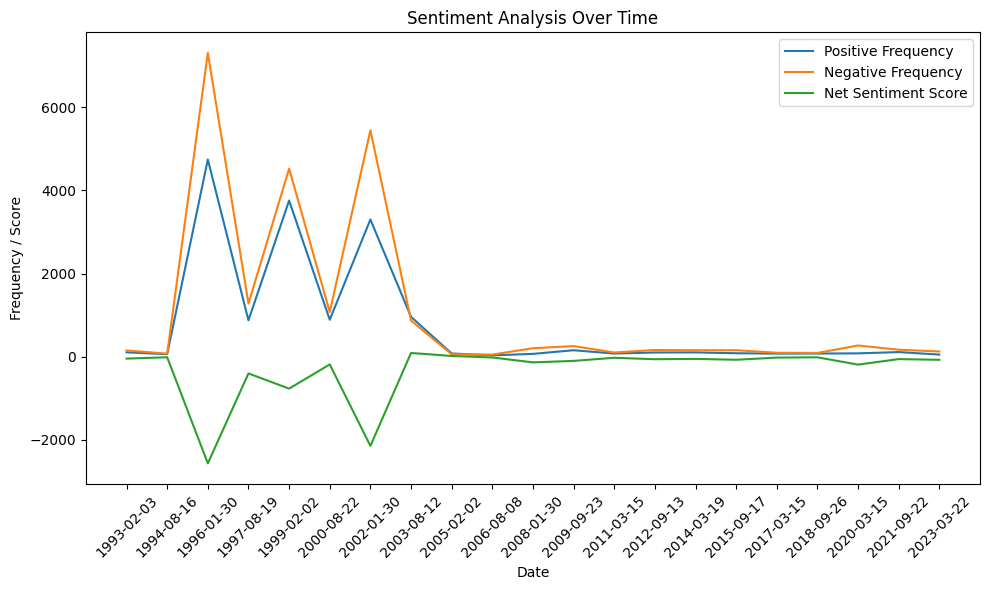

In [8]:
# Filter dataset to include every 12th date
filtered_dataset = dataset[::12]

# Extract the required data
dates = filtered_dataset['Date']
positive_frequency = filtered_dataset['Positive Frequency']
negative_frequency = filtered_dataset['Negative Frequency']
net_sentiment_score = filtered_dataset['Net Sentiment Score']

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(dates, positive_frequency, label='Positive Frequency')
plt.plot(dates, negative_frequency, label='Negative Frequency')
plt.plot(dates, net_sentiment_score, label='Net Sentiment Score')

plt.xlabel('Date')
plt.ylabel('Frequency / Score')
plt.title('Sentiment Analysis Over Time')
plt.xticks(rotation=45)

plt.legend()
plt.tight_layout()
plt.show()

In [9]:
last_20_positive = dataset['Positive Frequency'][-20:]
last_20_negative= dataset['Negative Frequency'][-20:]
last_20_net = dataset['Net Sentiment Score'][-20:]

combined_df = pd.concat([last_20_positive, last_20_negative, last_20_net], axis=1)
combined_df

Positive Frequency  Negative Frequency  Net Sentiment Score
223                 155                 177                  -22
224                 126                 122                    4
225                 118                 139                  -21
226                 127                 123                    4
227                 142                 174                  -32
228                 112                 169                  -57
229                 112                 145                  -33
230                 116                 137                  -21
231                 133                 165                  -32
232                  67                 130                  -63
233                  70                 132                  -62
234                  69                 166                  -97
235                  85                 185                 -100
236                  71                 168                  -97
237                  69                 184                 -115
238                  77                 184                 -107
239                  80                 174                  -94
240                  52                 126                  -74
241                  67                 202                 -135
242                  56                 118                  -62

In [10]:
# Create dictionaries to store positive and negative word frequencies per row
positive_word_frequencies = {}
negative_word_frequencies = {}

# Iterate over each row in the preprocessed text
for index, datapoint in dataset['Preprocessed Text'].iteritems():
    words = datapoint.lower().split()  # Tokenize the text into words

    # Iterate over each word and check its sentiment
    for word in words:
        if word in sentiment_word_list:
            sentiment = sentiment_word_list[word]
            if sentiment == 1:
                positive_word_frequencies[word] = positive_word_frequencies.get(word, 0) + 1
            elif sentiment == -1:
                negative_word_frequencies[word] = negative_word_frequencies.get(word, 0) + 1

# Get the 10 most frequent positive words
top_positive_words = sorted(positive_word_frequencies, key=positive_word_frequencies.get, reverse=True)[:10]

# Get the 10 most frequent negative words
top_negative_words = sorted(negative_word_frequencies, key=negative_word_frequencies.get, reverse=True)[:10]

print("Top 10 Positive Words:")
for word in top_positive_words:
    print(f"{word}: {positive_word_frequencies[word]}")

print("\nTop 10 Negative Words:")
for word in top_negative_words:
    print(f"{word}: {negative_word_frequencies[word]}")


C:\Users\abact\AppData\Local\Temp\ipykernel_11424\1660354915.py:6: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, datapoint in dataset['Preprocessed Text'].iteritems():


Top 10 Positive Words:
stability: 10655
good: 9898
gain: 9618
strong: 8208
strength: 6658
favorable: 5775
despite: 5014
positive: 3572
strengthening: 3321
improvement: 3030

Top 10 Negative Words:
decline: 13165
weakness: 6797
easing: 6744
concern: 6456
declined: 5932
unemployment: 5721
tightening: 5517
slowed: 3914
slowing: 3709
deficit: 3581


### We also want to understand the relative number of positive and negative words in each speech. Just knowing the number of positive and negative words alone doesn't tell us much about the scope of the net sentimentality.

In [11]:
# Create an empty list to store the word counts
word_count = []

# Iterate over each row in the preprocessed text
for datapoint in dataset['Preprocessed Text']:
    words = datapoint.lower().split()  # Tokenize the text into words
    num_words = len(words)  # Calculate the number of words in the row
    word_count.append(num_words)  # Add the word count to the list

# Print the word counts
print("Word Count:")
for count in word_count:
    print(count)

Word Count:
6085
3059
3520
4268
2859
3045
3582
3502
6108
3871
2994
4022
2971
3108
3368
3443
4827
4603
3060
4141
2692
2950
3022
2988
231389
15282
16975
19898
20140
19655
20164
19933
56259
51364
52203
71523
49348
42634
55571
246599
25738
48807
78222
62890
57291
65547
91559
55537
165012
49642
49878
80203
86734
46980
49837
57213
171840
55604
43086
49728
44928
38459
46097
59216
198937
56314
57865
61388
55999
42042
50670
48213
151379
51825
40665
94274
85917
108403
65178
63792
35229
138615
3984
60628
42010
43634
40003
48103
15460
34608
3132
2964
35611
2327
2625
2533
4381
2730
2612
2725
2139
2296
2368
2317
4099
2845
3011
2397
2397
35981
2701
2792
4647
2614
2841
2622
2828
3542
7057
48062
6996
3793
8166
3252
2869
4968
4736
18119
4015
3906
5095
4318
8600
4457
4879
6507
4025
4247
4849
4034
4338
3627
4042
6191
4080
4664
4240
4010
4979
4619
4576
6732
3998
4914
4539
4421
4821
4641
4181
6671
4633
4439
4624
5180
4459
4835
5414
5145
7247
3746
4871
5107
5140
5335
4183
7768
5288
4918
5201
5447
4806
5251
4

In [12]:
# Calculate the proportions of positive words per minute for each row
positive_words_per_minute = dataset['Positive Frequency'] / word_count

# Calculate the proportions of negative words per minute for each row
negative_words_per_minute = dataset['Negative Frequency'] / word_count

# Add the calculated columns to the dataset
dataset['Proportion Positive Words'] = positive_words_per_minute
dataset['Proportion Negative Words'] = negative_words_per_minute
dataset['Word Count'] = word_count

In [13]:
# Select the last 7 columns
last_7_columns = dataset.iloc[:, -7:]

# Calculate summary statistics
summary = last_7_columns.describe()

# Display the summary statistics
print(summary)

       Negative Frequency  Sentiment Label  Proportion Positive Words  \
count          243.000000       243.000000                 243.000000   
mean           697.390947         0.098765                   0.018781   
std           1219.322908         0.298963                   0.004299   
min             35.000000         0.000000                   0.008655   
25%            117.500000         0.000000                   0.015693   
50%            153.000000         0.000000                   0.018689   
75%            686.500000         0.000000                   0.021596   
max           7604.000000         1.000000                   0.030323   

       Proportion Negative Words     Word Count  
count                 243.000000     243.000000  
mean                    0.029537   21522.802469  
std                     0.008180   36566.631242  
min                     0.013467    2139.000000  
25%                     0.024042    4257.500000  
50%                     0.028208    5417.0

### While Net Sentiment Score will suffice for model building, it is hard to interpret. As such, we will standardize the Net Sentiment Score around 0 and evaluate the magnitude of positivity and negativity around a 0 mean with standard deviations used to calculate magnitude above or below mean

In [14]:
# Create an instance of the MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))

# Reshape the Net Sentiment Score column
net_sentiment_scores = dataset["Net Sentiment Score"].values.reshape(-1, 1)

# Scale the scores to the range of -1 to 1
scaled_scores = scaler.fit_transform(net_sentiment_scores)

# Add a new column for the scaled scores
dataset["Standardized Sentiment Score"] = scaled_scores

In [15]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
print(dataset["Standardized Sentiment Score"])

0      0.837894
1      0.839983
2      0.842072
3      0.846668
4      0.847086
5      0.846668
6      0.850428
7      0.854188
8      0.859202
9      0.839565
10     0.844161
11     0.840819
12     0.851264
13     0.840401
14     0.857113
15     0.846250
16     0.840819
17     0.829538
18     0.841237
19     0.843326
20     0.848757
21     0.859620
22     0.842490
23     0.856277
24    -0.214957
25     0.786505
26     0.844997
27     0.780238
28     0.670357
29     0.795279
30     0.817422
31     0.853353
32     0.789012
33     0.500731
34     0.872572
35     0.915605
36     0.688740
37     0.764780
38     0.757677
39     0.370796
40     0.847086
41     0.593482
42     0.445582
43     0.407980
44     0.469814
45     0.070399
46    -0.087529
47     0.659912
48     0.536244
49     0.898475
50     0.794025
51     0.733445
52     0.587215
53     0.948193
54     0.723835
55     0.638605
56     0.621893
57     0.848339
58     0.797786
59     0.655316
60     0.779403
61     0.756841
62     0

In [16]:
# Calculate summary statistics
summary = dataset.describe()

summary

Difference    Increase    Decrease       Level         CPI  \
count  243.000000  243.000000  243.000000  243.000000  243.000000   
mean     0.020576    0.066872    0.046296    2.532922  208.985165   
std      0.224042    0.152131    0.144338    2.157044   41.215790   
min     -1.000000    0.000000    0.000000    0.250000  142.800000   
25%      0.000000    0.000000    0.000000    0.250000  173.150000   
50%      0.000000    0.000000    0.000000    1.750000  211.933000   
75%      0.000000    0.000000    0.000000    4.875000  237.747000   
max      0.750000    0.750000    1.000000    6.500000  303.841000   

       Unemployment Rate  Consumer Sentiment   Retail Sales  \
count         243.000000          243.000000     243.000000   
mean            5.706584           86.728395  330140.255144   
std             1.796472           13.262564  110908.479021   
min             3.400000           50.000000  154752.000000   
25%             4.400000           77.400000  249835.000000   
50%             5.300000           89.300000  321794.000000   
75%             6.300000           95.950000  395192.000000   
max            14.700000          112.000000  603211.000000   

       Durable Goods Orders  Short-Term Treasury Bond Rate  \
count            243.000000                     243.000000   
mean          202059.123457                       2.283128   
std            36914.049948                       2.063220   
min           121637.000000                       0.010000   
25%           173638.500000                       0.145000   
50%           203636.000000                       1.720000   
75%           228375.000000                       4.505000   
max           302077.000000                       6.190000   

       Long-Term Treasury Bond Rate  Bank Reserves  Housing Sales  \
count                    243.000000     243.000000     243.000000   
mean                       3.893663     143.791008     716.654321   
std                        1.744364     305.322997     257.786789   
min                        0.620000       4.529000     282.000000   
25%                        2.380000       5.374000     533.500000   
50%                        3.810000      12.769000     693.000000   
75%                        5.260000     136.304000     881.000000   
max                        7.960000    1804.944000    1336.000000   

       Nonfarm Payroll         LEI         CEI         LAG  Treasury Deposits  \
count       243.000000  243.000000  243.000000  243.000000         243.000000   
mean     134360.283951   -0.143661   -0.090297   -0.163148         144.274761   
std       10590.954569    1.230830    1.215758    3.715713         299.458558   
min      109794.000000  -10.208447  -13.093399  -34.146136           4.752000   
25%      130194.500000   -0.728432   -0.255882   -0.936194           5.448000   
50%      133153.000000   -0.081840   -0.022004    0.312015           7.785000   
75%      141727.500000    0.469772    0.323683    1.509640         135.648000   
max      156204.000000    3.009298    4.211526   12.646620        1717.534000   

       Average Hourly Earnings  Net Sentiment Score  Positive Frequency  \
count               243.000000           243.000000          243.000000   
mean                 17.998272          -249.164609          448.226337   
std                   4.676710           546.302157          778.700662   
min                  10.930000         -4444.000000           33.000000   
25%                  14.095000          -143.500000           73.000000   
50%                  17.880000           -58.000000           94.000000   
75%                  21.210000           -25.000000          420.000000   
max                  28.830000           343.000000         5233.000000   

       Negative Frequency  Sentiment Label  Proportion Positive Words  \
count          243.000000       243.000000                 243.000000   
mean           697.390947         0.098765                   0.018781   
std        

In [17]:
# Create a copy of the dataset
clean_data_numeric = dataset.copy()

# Remove 'Federal_Reserve_Mins' and 'Preprocessed Text' columns
clean_data_numeric = clean_data_numeric.drop(['Federal_Reserve_Mins', 'Preprocessed Text'], axis=1)

# Display the resulting clean_data_numeric subset
clean_data_numeric.head()

Date  Difference  Increase  Decrease  Level    CPI  \
0  1993-02-03         0.0       0.0       0.0   3.75  142.8   
1  1993-03-23         0.0       0.0       0.0   3.75  143.3   
2  1993-05-18         0.0       0.0       0.0   3.75  144.2   
3  1993-07-07        -0.5       0.0       0.5   3.25  144.5   
4  1993-08-17         0.0       0.0       0.0   3.25  144.8   

   Unemployment Rate  Consumer Sentiment  Retail Sales  Durable Goods Orders  \
0                7.3                89.3      157555.0              121637.0   
1                7.0                85.9      154752.0              126762.0   
2                7.1                80.3      160605.0              126529.0   
3                6.9                77.0      162816.0              128111.0   
4                6.8                77.3      162506.0              129378.0   

   Short-Term Treasury Bond Rate  Long-Term Treasury Bond Rate  Bank Reserves  \
0                           2.90                          6.60          8.761   
1                           2.95                          5.98          5.563   
2                           2.93                          6.04          5.646   
3                           2.95                          5.81         16.256   
4                           3.01                          5.68          5.661   

   Housing Sales  Nonfarm Payroll       LEI       CEI       LAG  \
0          596.0         109794.0 -1.551953 -0.042868  1.405808   
1          602.0         109992.0 -1.201573 -0.567852 -0.722944   
2          626.0         110570.0 -0.853028 -0.112893  0.469678   
3          655.0         111060.0 -0.142940 -0.050447 -0.028876   
4          645.0         111209.0 -0.215798 -0.033761  0.100506   

   Treasury Deposits  Average Hourly Earnings  Net Sentiment Score  \
0              7.400                    10.93                  -45   
1              5.449                    10.99                  -40   
2              5.952                    11.01                  -35   
3              6.289                    11.05                  -24   
4              5.810                    11.07                  -23   

   Positive Frequency  Negative Frequency  Sentiment Label  \
0                 106                 151                0   
1                  62                 102                0   
2                  89                 124                0   
3                  88                 112                0   
4                  61                  84                0   

                                      Positive Words  \
0  [pleasure, satisfactory, satisfactory, opportu...   
1  [strong, gain, despite, strong, gain, gain, go...   
2  [strong, gain, strengthened, strong, gain, goo...   
3  [strength, gain, gain, good, good, rebound, hi...   
4  [gain, strong, gain, good, rebounded, gain, st...   

                                      Negative Words  \
0  [discontinuance, cease, question, question, un...   
1  [slowed, sluggish, diminished, disappointing, ...   
2  [unemployment, sharply, depressed, unemploymen...   
3  [absence, slow, slowed, declined, unemployment...   
4  [decline, lost, slower, unemployment, dropped,...   

   Proportion Positive Words  Proportion Negative Words  Word Count  \
0                   0.017420                   0.024815        6085   
1                   0.020268                   0.033344        3059   
2                   0.025284                   0.035227        3520   
3                   0.020619                   0.026242        4268   
4                   0.021336                   0.029381        2859   

   Standardized Sentiment Score  
0                      0.837894  
1                      0.839983  
2                      0.842072  
3                      0.846668  
4                      0.847086

### Here, we move to further Exploratory Data Analysis. We begin with a correlation matrix to see if there are any endogenous correlations to a degree that one does not need to be included

              Date  Difference  Increase  Decrease  Level    CPI  \
count          243       243.0     243.0     243.0  243.0  243.0   
unique         243         NaN       NaN       NaN    NaN    NaN   
top     1993-02-03         NaN       NaN       NaN    NaN    NaN   
freq             1         NaN       NaN       NaN    NaN    NaN   
mean           NaN         0.0       0.1       0.0    2.5  209.0   
std            NaN         0.2       0.2       0.1    2.2   41.2   
min            NaN        -1.0       0.0       0.0    0.2  142.8   
25%            NaN         0.0       0.0       0.0    0.2  173.1   
50%            NaN         0.0       0.0       0.0    1.8  211.9   
75%            NaN         0.0       0.0       0.0    4.9  237.7   
max            NaN         0.8       0.8       1.0    6.5  303.8   

        Unemployment Rate  Consumer Sentiment  Retail Sales  \
count               243.0               243.0         243.0   
unique                NaN                 NaN           N

C:\Users\abact\AppData\Local\Temp\ipykernel_11424\4195205912.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = clean_data_numeric.corr().round(1)  # Round to one decimal place


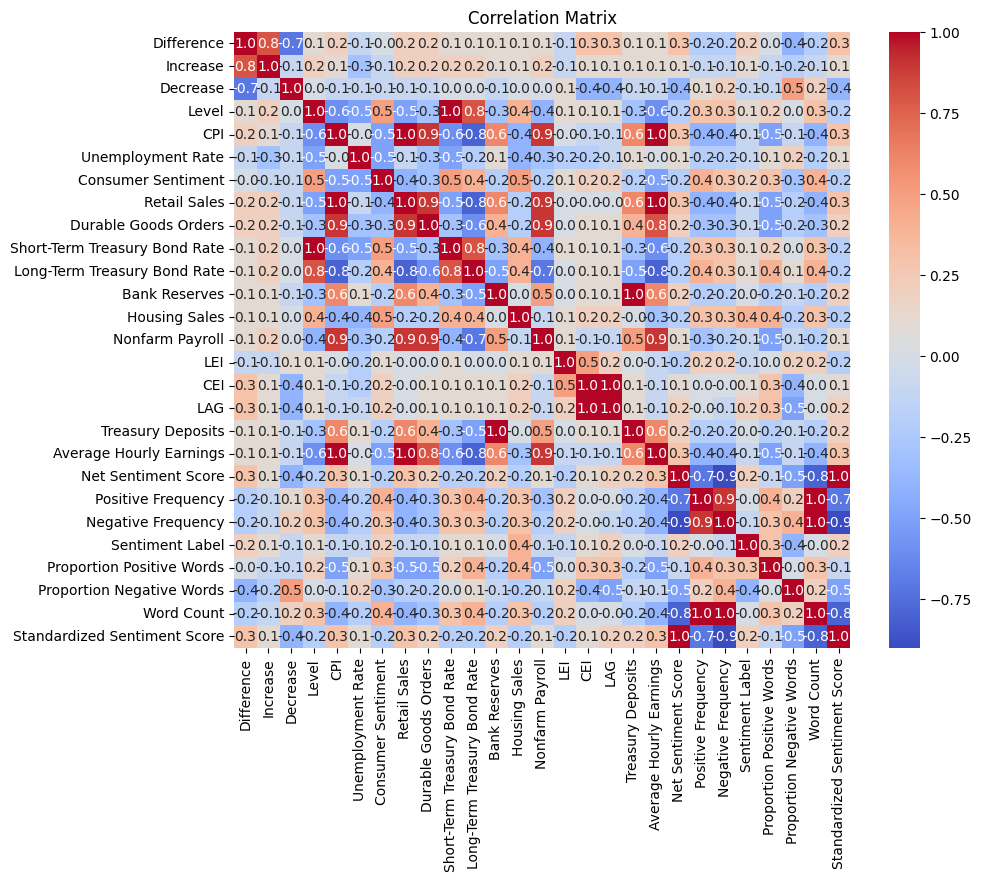

In [18]:
summary_stats = clean_data_numeric.describe(include='all')
summary_stats = summary_stats.round(1)  # Round to one decimal place
print(summary_stats)

correlation_matrix = clean_data_numeric.corr().round(1)  # Round to one decimal place
print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f", square=True)  # Format to one decimal place
plt.title('Correlation Matrix')
plt.show()

In [19]:
# Calculate the correlation matrix
correlation_matrix = dataset.corr()

# Get the absolute correlation values and sort them in descending order
correlation_values = correlation_matrix.abs().unstack().sort_values(ascending=False)

# Filter out the diagonal elements (self-correlations) and duplicate pairs
correlation_values = correlation_values[correlation_values.index.get_level_values(0) < correlation_values.index.get_level_values(1)]

# Get the top 20 highest correlation coefficients
top_20_correlations = correlation_values[correlation_values >= 0.8].head(50)

# Display the filtered correlations
print(top_20_correlations)

Net Sentiment Score           Standardized Sentiment Score     1.000000
Level                         Short-Term Treasury Bond Rate    0.996657
Average Hourly Earnings       CPI                              0.996307
Bank Reserves                 Treasury Deposits                0.994742
Average Hourly Earnings       Retail Sales                     0.984480
Positive Frequency            Word Count                       0.983542
CPI                           Retail Sales                     0.981044
Negative Frequency            Word Count                       0.964453
CEI                           LAG                              0.955798
Negative Frequency            Positive Frequency               0.945077
Nonfarm Payroll               Retail Sales                     0.922469
CPI                           Nonfarm Payroll                  0.913481
Average Hourly Earnings       Nonfarm Payroll                  0.907480
Negative Frequency            Net Sentiment Score              0

C:\Users\abact\AppData\Local\Temp\ipykernel_11424\380872997.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dataset.corr()


In [20]:
# Calculate the correlation matrix
correlation_matrix = dataset.corr()

# Get the absolute correlation values and sort them in ascending order
correlation_values = correlation_matrix.abs().unstack().sort_values(ascending=True)

# Filter out the diagonal elements (self-correlations) and duplicate pairs
correlation_values = correlation_values[correlation_values.index.get_level_values(0) < correlation_values.index.get_level_values(1)]

# Get the 20 lowest correlation coefficients
lowest_correlations = correlation_values[correlation_values <= 0.1].head(30)

# Display the filtered correlations
print(lowest_correlations)

Housing Sales              Treasury Deposits                0.003742
Proportion Negative Words  Proportion Positive Words        0.004395
                           Short-Term Treasury Bond Rate    0.004888
Positive Frequency         Sentiment Label                  0.005599
Bank Reserves              Housing Sales                    0.006109
Decrease                   Nonfarm Payroll                  0.006152
Consumer Sentiment         Difference                       0.011149
LAG                        Retail Sales                     0.012051
Decrease                   Long-Term Treasury Bond Rate     0.013479
CEI                        Word Count                       0.013604
                           Retail Sales                     0.015961
LEI                        Retail Sales                     0.017027
Decrease                   Housing Sales                    0.020006
Average Hourly Earnings    Unemployment Rate                0.020410
CPI                        Unemplo

C:\Users\abact\AppData\Local\Temp\ipykernel_11424\2524194299.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dataset.corr()


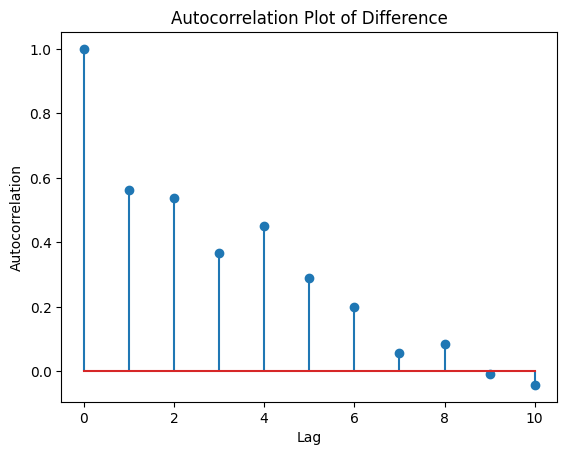

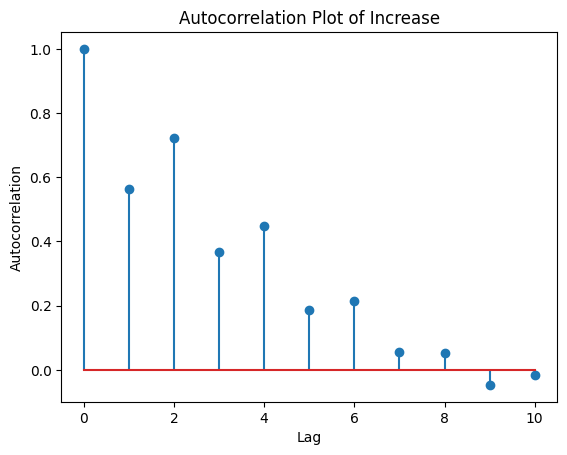

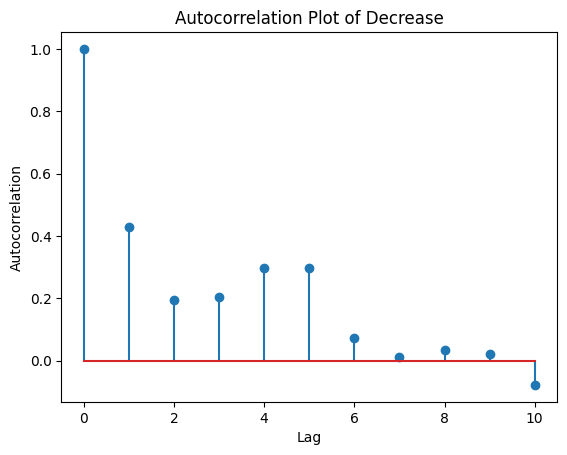

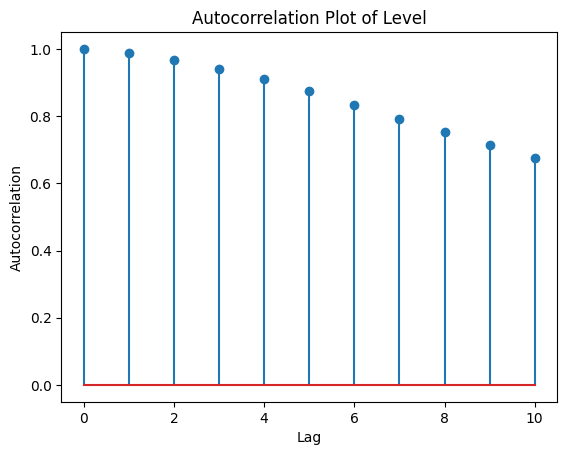

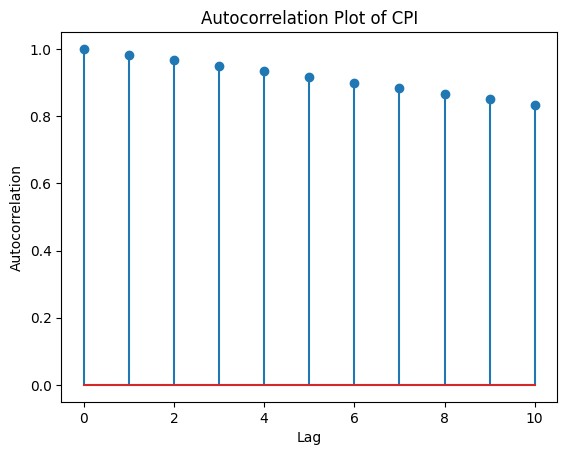

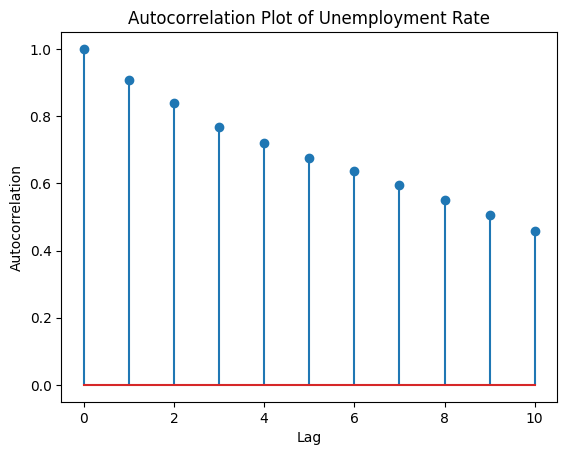

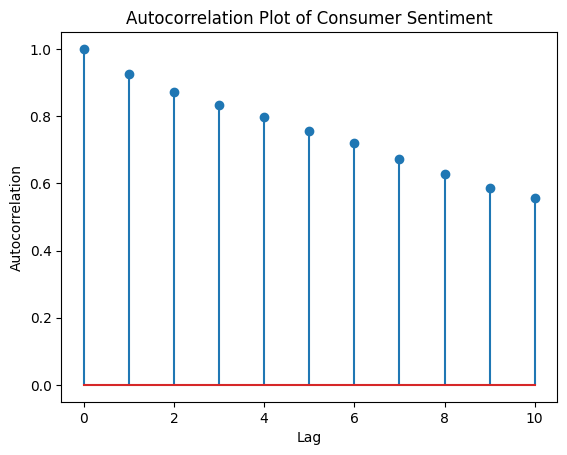

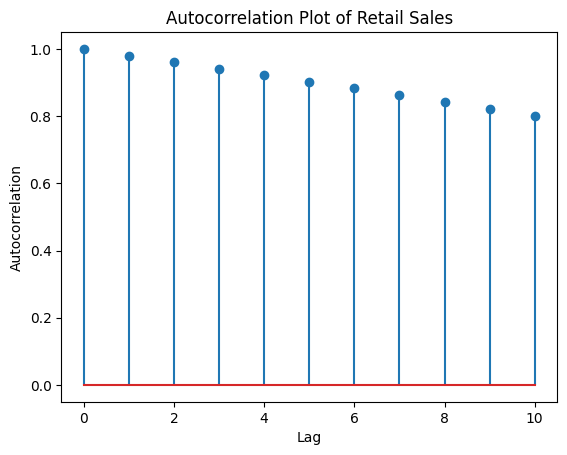

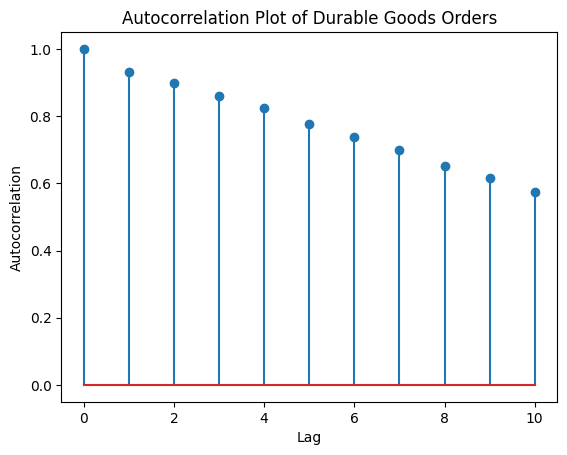

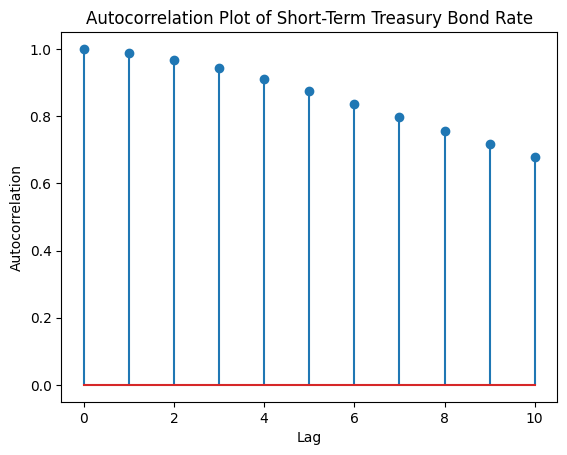

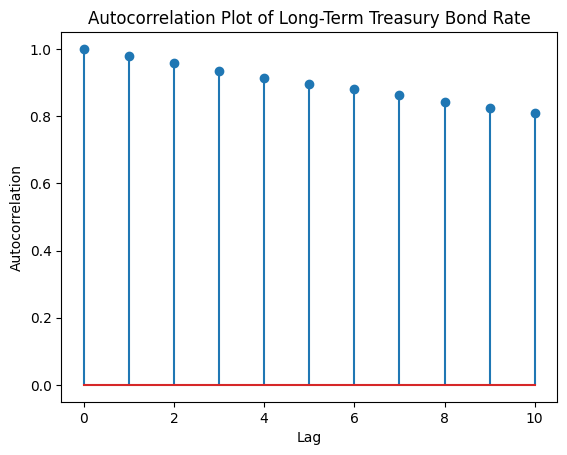

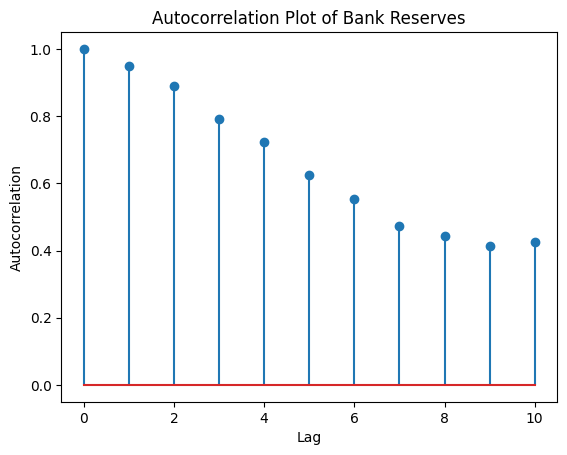

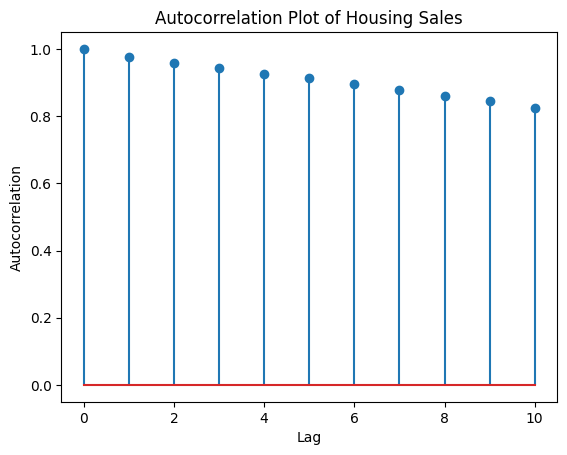

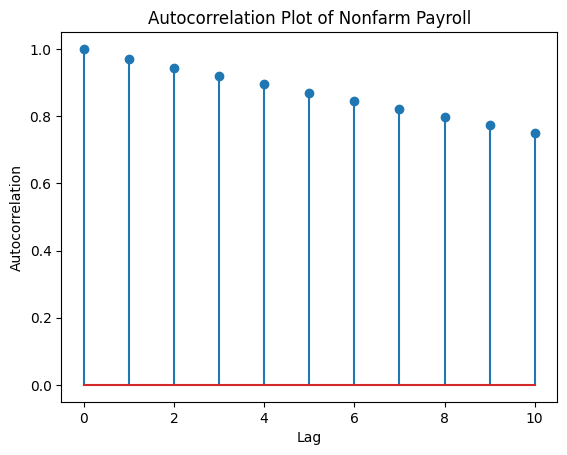

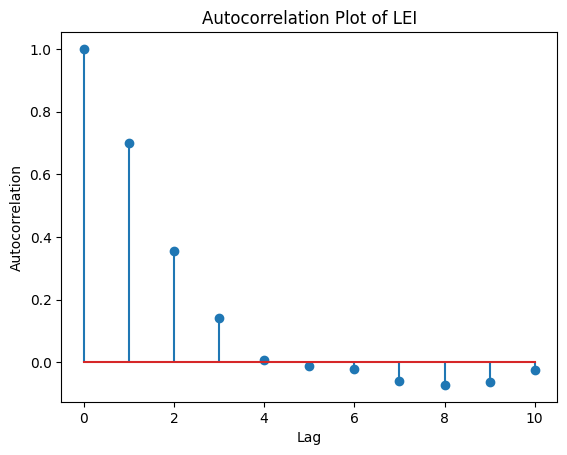

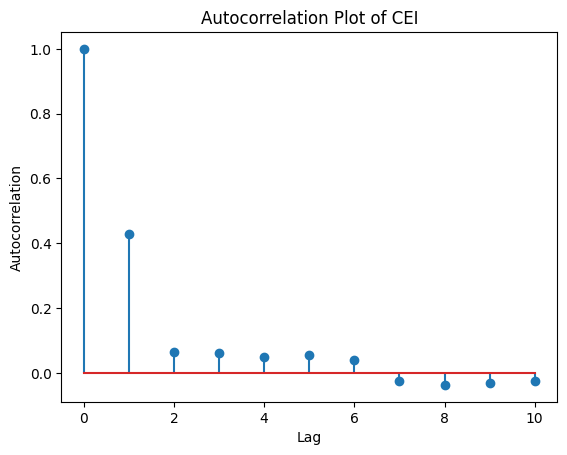

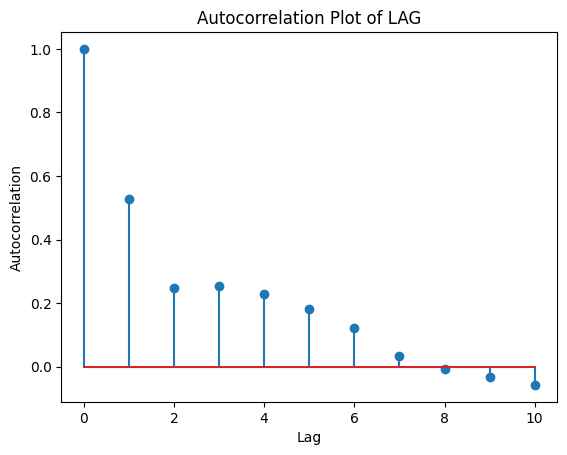

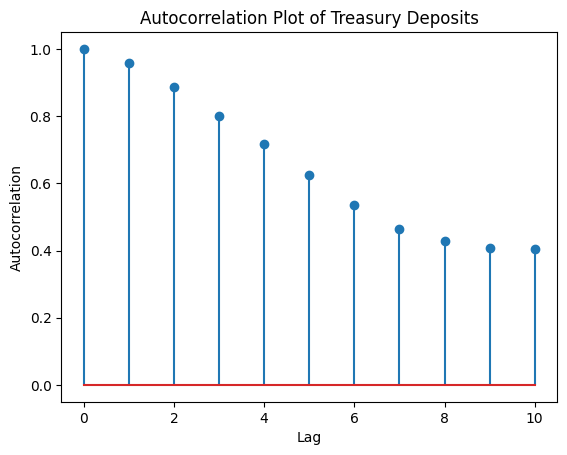

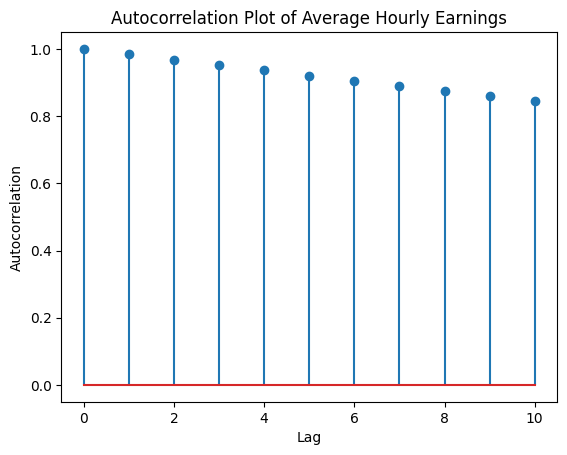

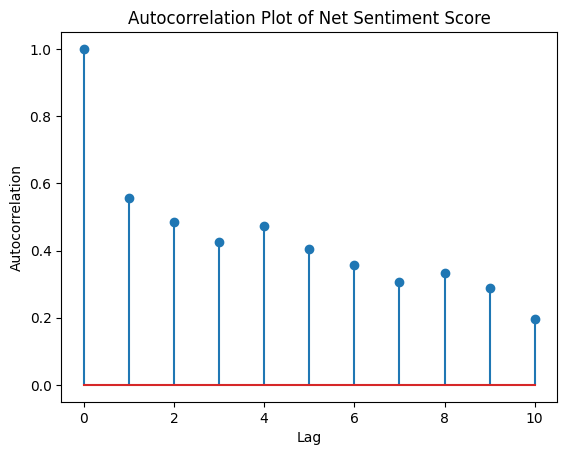

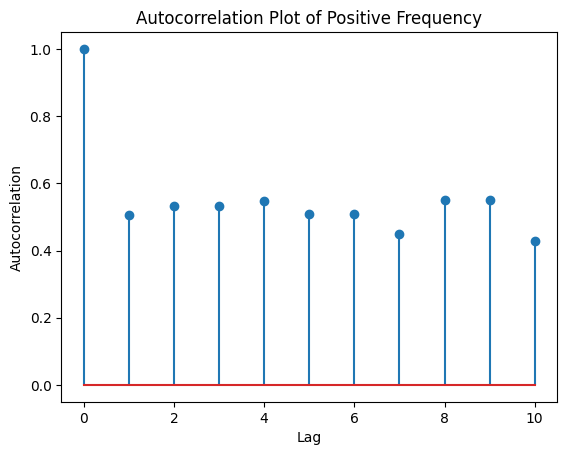

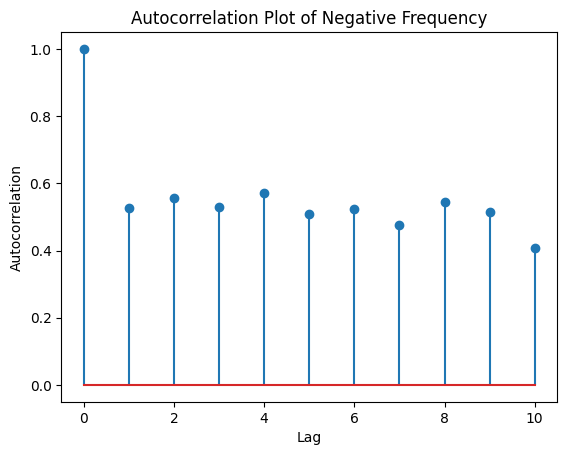

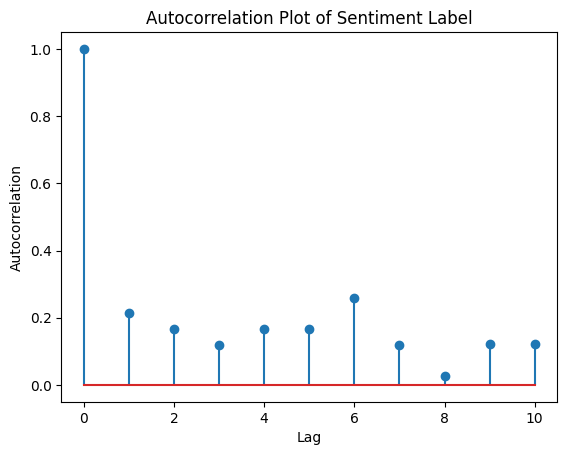

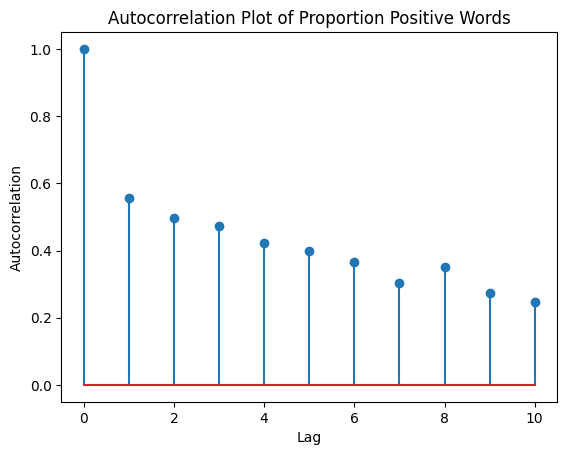

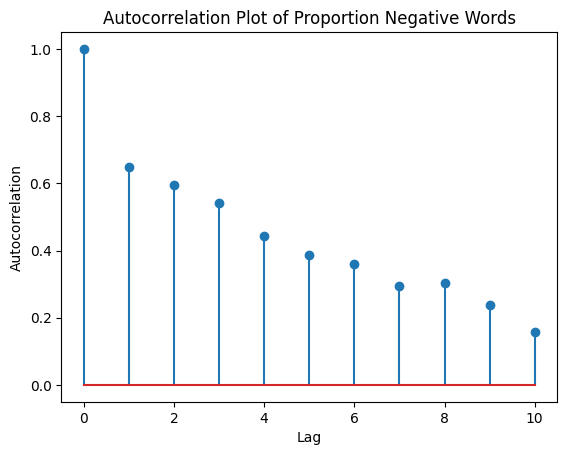

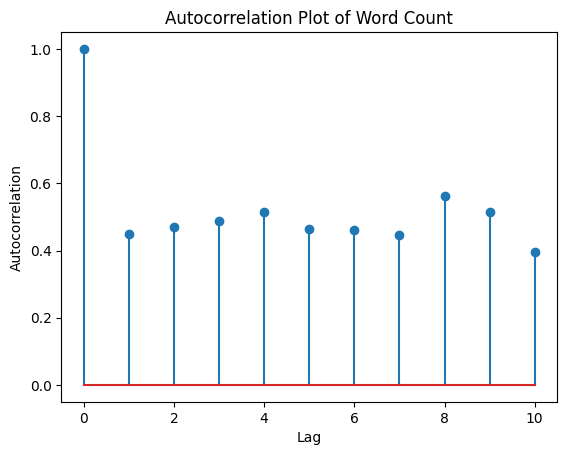

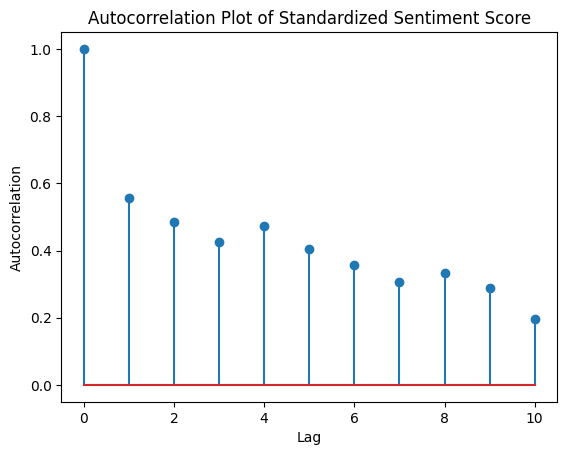

In [21]:
# Iterate over each column (excluding 'Date' and 'Sentiment Label', 'Positive Words', 'Negative Words')
for column in clean_data_numeric.columns:
    if column not in ['Date', 'Positive Words', 'Negative Words']:
        # Compute the autocorrelation
        acf = sm.tsa.acf(clean_data_numeric[column], nlags=10)
        
        # Plot the autocorrelation
        plt.stem(range(len(acf)), acf)
        plt.xlabel('Lag')
        plt.ylabel('Autocorrelation')
        plt.title(f'Autocorrelation Plot of {column}')
        plt.show()

### Z-scores are an important metric when calculating skewness. Any data that has an inherent trend will need to have that trend considered before being used for causal inference, as that skewness may have an endogenous explanation of its own.

In [22]:
# Select only numeric columns
numeric_columns = clean_data_numeric.select_dtypes(include=np.number).columns

# Calculate z-scores for each numeric column in the dataset
z_scores = stats.zscore(clean_data_numeric[numeric_columns])

# Create a new DataFrame with z-scores
z_scores_df = pd.DataFrame(z_scores, columns=numeric_columns)

z_scores

z_scores_df


Difference  Increase  Decrease     Level       CPI  Unemployment Rate  \
0     -0.092030 -0.440478 -0.321412  0.565399 -1.609135           0.888800   
1     -0.092030 -0.440478 -0.321412  0.565399 -1.596979           0.721461   
2     -0.092030 -0.440478 -0.321412  0.565399 -1.575097           0.777241   
3     -2.328363 -0.440478  3.149839  0.333122 -1.567804           0.665682   
4     -0.092030 -0.440478 -0.321412  0.333122 -1.560510           0.609902   
5     -0.092030 -0.440478 -0.321412  0.333122 -1.555647           0.554123   
6     -0.092030 -0.440478 -0.321412  0.333122 -1.531335           0.498343   
7     -0.092030 -0.440478 -0.321412  0.333122 -1.524041           0.442564   
8      1.026136  1.206232 -0.321412  0.333122 -1.524041           0.498343   
9      1.026136  1.206232 -0.321412  0.449260 -1.504591           0.442564   
10     2.144303  2.852943 -0.321412  0.797676 -1.494866           0.219445   
11    -0.092030 -0.440478 -0.321412  0.797676 -1.472984           0.219445   
12     2.144303  2.852943 -0.321412  1.029953 -1.458397           0.163666   
13    -0.092030 -0.440478 -0.321412  1.029953 -1.451103           0.107886   
14     3.262469  4.499653 -0.321412  1.378369 -1.438947          -0.059452   
15    -0.092030 -0.440478 -0.321412  1.378369 -1.431653          -0.115232   
16     2.144303  2.852943 -0.321412  1.610646 -1.421928          -0.059452   
17    -0.092030 -0.440478 -0.321412  1.610646 -1.404909          -0.171011   
18    -0.092030 -0.440478 -0.321412  1.610646 -1.383028          -0.059452   
19    -1.210197 -0.440478  1.414214  1.494508 -1.370871          -0.003673   
20    -0.092030 -0.440478 -0.321412  1.494508 -1.363578          -0.003673   
21    -0.092030 -0.440478 -0.321412  1.494508 -1.358715          -0.059452   
22    -0.092030 -0.440478 -0.321412  1.494508 -1.344127          -0.059452   
23    -1.210197 -0.440478  1.414214  1.378369 -1.339265          -0.059452   
24    -1.210197 -0.440478  1.414214  1.262230 -1.319815          -0.059452   
25    -0.092030 -0.440478 -0.321412  1.262230 -1.300365          -0.115232   
26    -0.092030 -0.440478 -0.321412  1.262230 -1.278483          -0.059452   
27    -0.092030 -0.440478 -0.321412  1.262230 -1.271190          -0.226791   
28    -0.092030 -0.440478 -0.321412  1.262230 -1.259033          -0.338350   
29    -0.092030 -0.440478 -0.321412  1.262230 -1.246877          -0.282570   
30    -0.092030 -0.440478 -0.321412  1.262230 -1.222564          -0.171011   
31    -0.092030 -0.440478 -0.321412  1.262230 -1.212839          -0.171011   
32    -0.092030 -0.440478 -0.321412  1.262230 -1.205545          -0.226791   
33     1.026136  1.206232 -0.321412  1.378369 -1.195820          -0.282570   
34    -0.092030 -0.440478 -0.321412  1.378369 -1.193389          -0.449909   
35    -0.092030 -0.440478 -0.321412  1.378369 -1.186095          -0.394130   
36    -0.092030 -0.440478 -0.321412  1.378369 -1.171508          -0.505689   
37    -0.092030 -0.440478 -0.321412  1.378369 -1.161783          -0.449909   
38    -0.092030 -0.440478 -0.321412  1.378369 -1.149626          -0.617248   
39    -0.092030 -0.440478 -0.321412  1.378369 -1.147195          -0.561468   
40    -0.092030 -0.440478 -0.321412  1.378369 -1.142333          -0.617248   
41    -0.092030 -0.440478 -0.321412  1.378369 -1.142333          -0.561468   
42    -0.092030 -0.440478 -0.321412  1.378369 -1.127745          -0.728807   
43    -0.092030 -0.440478 -0.321412  1.378369 -1.122883          -0.673027   
44    -0.092030 -0.440478 -0.321412  1.378369 -1.108295          -0.673027   
45    -1.210197 -0.440478  1.414214  1.262230 -1.105864          -0.617248   
46    -1.210197 -0.440478  1.414214  1.029953 -1.091276          -0.728807   
47    -0.092030 -0.440478 -0.321412  1.029953 -1.083982          -0.728807   
48    -0.092030 -0.440478 -0.321412  1.029953 -1.076689          -0.784586   
49    -0.092030 -0.440478 -0.321412  1.029953 -1.074257          -0.840366   
50    -0.092030 -0.440478 -

In [23]:
def calculate_z_scores(data):
    n = len(data)
    if data.dtype.kind in ['i', 'f']:  # Check if data is numeric
        observed_skewness = skew(data)
        observed_kurtosis = kurtosis(data)

        expected_skewness = 0
        expected_kurtosis = 0

        standard_error_skewness = np.sqrt(6 / n)
        standard_error_kurtosis = np.sqrt(24 / n)

        z_score_skewness = (observed_skewness - expected_skewness) / standard_error_skewness
        z_score_kurtosis = (observed_kurtosis - expected_kurtosis) / standard_error_kurtosis

        return z_score_skewness, z_score_kurtosis
    else:
        return None, None


# Calculate z-scores for skewness and kurtosis for each column in the dataset
z_scores = {}
for column in dataset.columns:
    z_score_skewness, z_score_kurtosis = calculate_z_scores(dataset[column])
    if z_score_skewness is not None and z_score_kurtosis is not None:
        z_scores[column] = (z_score_skewness, z_score_kurtosis)

# Print the z-scores for each column
for column, (z_score_skewness, z_score_kurtosis) in z_scores.items():
    print("Column:", column)
    print("Z-score for skewness:", z_score_skewness)
    print("Z-score for kurtosis:", z_score_kurtosis)
    print()

Column: Difference
Z-score for skewness: -1.4690819899083853
Z-score for kurtosis: 13.734537414148257

Column: Increase
Z-score for skewness: 16.89089092795846
Z-score for kurtosis: 23.647708606906797

Column: Decrease
Z-score for skewness: 22.817806160781355
Z-score for kurtosis: 44.24443824479442

Column: Level
Z-score for skewness: 2.301518353738542
Z-score for kurtosis: -4.646134019414528

Column: CPI
Z-score for skewness: 1.4019473912854852
Z-score for kurtosis: -2.665245469764956

Column: Unemployment Rate
Z-score for skewness: 8.628102622218
Z-score for kurtosis: 7.198065774326631

Column: Consumer Sentiment
Z-score for skewness: -3.2418607260414083
Z-score for kurtosis: -1.2700100788365527

Column: Retail Sales
Z-score for skewness: 3.927062906518213
Z-score for kurtosis: -0.34968786771969007

Column: Durable Goods Orders
Z-score for skewness: 0.6164657522176819
Z-score for kurtosis: -1.4405534187490014

Column: Short-Term Treasury Bond Rate
Z-score for skewness: 2.216924799434

In [24]:
clean_data_numeric

Date  Difference  Increase  Decrease  Level      CPI  \
0    1993-02-03        0.00      0.00      0.00   3.75  142.800   
1    1993-03-23        0.00      0.00      0.00   3.75  143.300   
2    1993-05-18        0.00      0.00      0.00   3.75  144.200   
3    1993-07-07       -0.50      0.00      0.50   3.25  144.500   
4    1993-08-17        0.00      0.00      0.00   3.25  144.800   
5    1993-09-21        0.00      0.00      0.00   3.25  145.000   
6    1993-11-16        0.00      0.00      0.00   3.25  146.000   
7    1993-12-21        0.00      0.00      0.00   3.25  146.300   
8    1994-02-04        0.25      0.25      0.00   3.25  146.300   
9    1994-03-22        0.25      0.25      0.00   3.50  147.100   
10   1994-05-17        0.50      0.50      0.00   4.25  147.500   
11   1994-07-06        0.00      0.00      0.00   4.25  148.400   
12   1994-08-16        0.50      0.50      0.00   4.75  149.000   
13   1994-09-27        0.00      0.00      0.00   4.75  149.300   
14   1994-11-15        0.75      0.75      0.00   5.50  149.800   
15   1994-12-20        0.00      0.00      0.00   5.50  150.100   
16   1995-02-01        0.50      0.50      0.00   6.00  150.500   
17   1995-03-28        0.00      0.00      0.00   6.00  151.200   
18   1995-05-23        0.00      0.00      0.00   6.00  152.100   
19   1995-07-06       -0.25      0.00      0.25   5.75  152.600   
20   1995-08-22        0.00      0.00      0.00   5.75  152.900   
21   1995-09-26        0.00      0.00      0.00   5.75  153.100   
22   1995-11-15        0.00      0.00      0.00   5.75  153.700   
23   1995-12-19       -0.25      0.00      0.25   5.50  153.900   
24   1996-01-30       -0.25      0.00      0.25   5.25  154.700   
25   1996-03-26        0.00      0.00      0.00   5.25  155.500   
26   1996-05-21        0.00      0.00      0.00   5.25  156.400   
27   1996-07-02        0.00      0.00      0.00   5.25  156.700   
28   1996-08-20        0.00      0.00      0.00   5.25  157.200   
29   1996-09-24        0.00      0.00      0.00   5.25  157.700   
30   1996-11-13        0.00      0.00      0.00   5.25  158.700   
31   1996-12-17        0.00      0.00      0.00   5.25  159.100   
32   1997-02-04        0.00      0.00      0.00   5.25  159.400   
33   1997-03-25        0.25      0.25      0.00   5.50  159.800   
34   1997-05-20        0.00      0.00      0.00   5.50  159.900   
35   1997-07-01        0.00      0.00      0.00   5.50  160.200   
36   1997-08-19        0.00      0.00      0.00   5.50  160.800   
37   1997-09-30        0.00      0.00      0.00   5.50  161.200   
38   1997-11-12        0.00      0.00      0.00   5.50  161.700   
39   1997-12-16        0.00      0.00      0.00   5.50  161.800   
40   1998-02-03        0.00      0.00      0.00   5.50  162.000   
41   1998-03-31        0.00      0.00      0.00   5.50  162.000   
42   1998-05-19        0.00      0.00      0.00   5.50  162.600   
43   1998-06-30        0.00      0.00      0.00   5.50  162.800   
44   1998-08-18        0.00      0.00      0.00   5.50  163.400   
45   1998-09-29       -0.25      0.00      0.25   5.25  163.500   
46   1998-11-17       -0.25      0.00      0.25   4.75  164.100   
47   1998-12-22        0.00      0.00      0.00   4.75  164.400   
48   1999-02-02        0.00      0.00      0.00   4.75  164.700   
49   1999-03-30        0.00      0.00      0.00   4.75  164.800   
50   1999-05-18        0.00      0.00      0.00   4.75  166.000   
51   1999-06-29        0.25      0.25      0.00   5.00  166.000   
52   1999-08-24        0.25      0.25      0.00   5.25  167.100   
53   1999-10-05        0.00      0.00      0.00   5.25  167.800   
54   1999-11-16        0.25      0.25      0.00   5.50  168.400   
55   1999-12-21        0.00      0.00      0.00   5.50  168.800   
56   2000-02-02        0.25      0.25      0.00   5.75  169.300   
57   2000-03-21        0.25      0.25      0.00   6.00  171.000   
58   2000-05-16        0.50      0.50      0.00   6.50  17

### Time plots are a good way to view trends and skewness, as well as eyeballing which variables seem to have relevance to the outcome variable and which need cleaning.

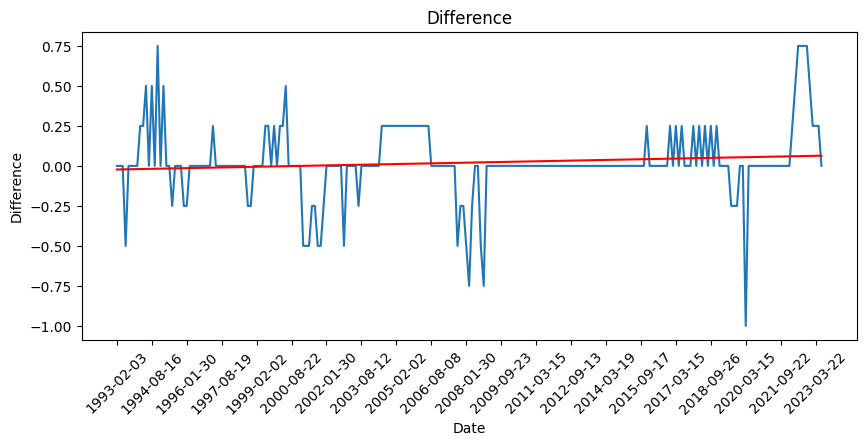

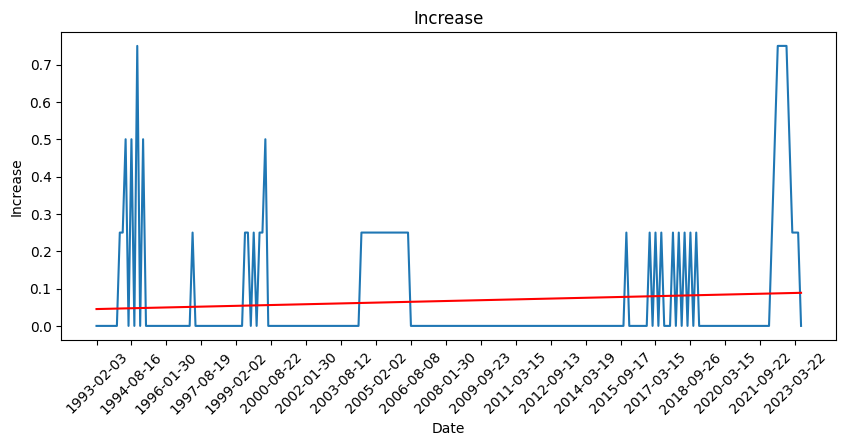

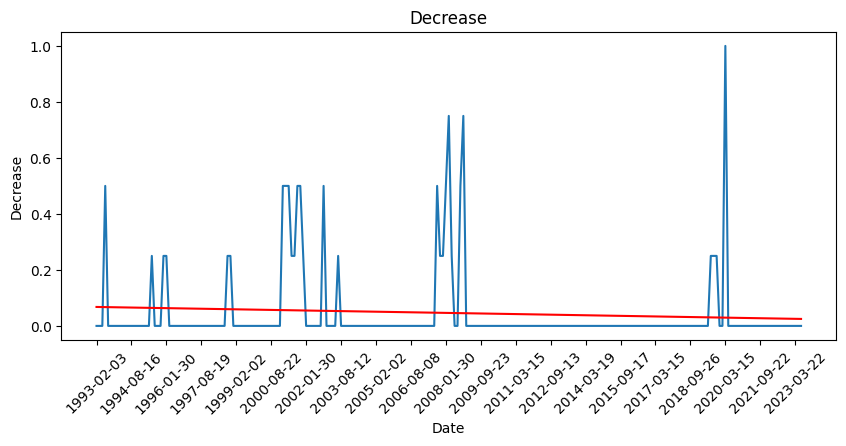

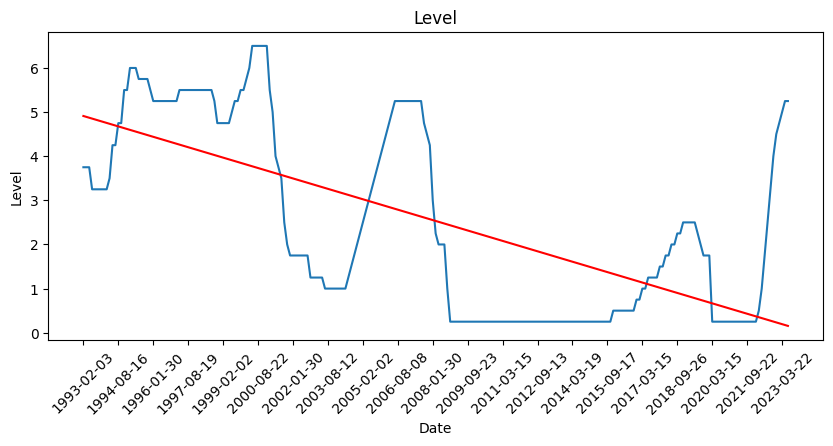

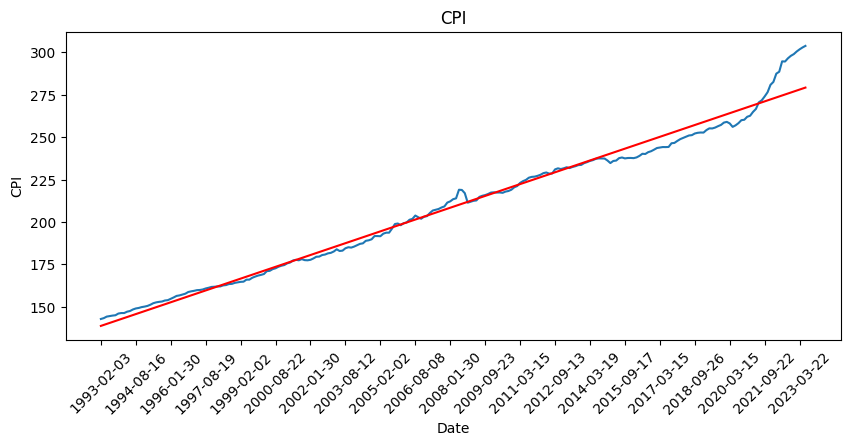

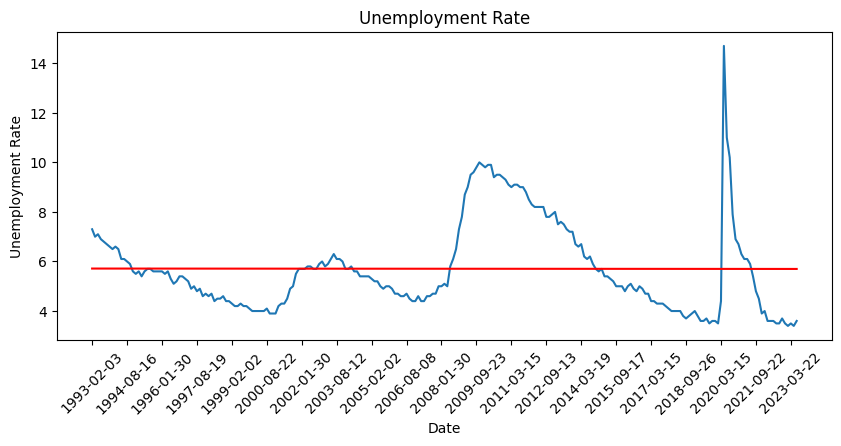

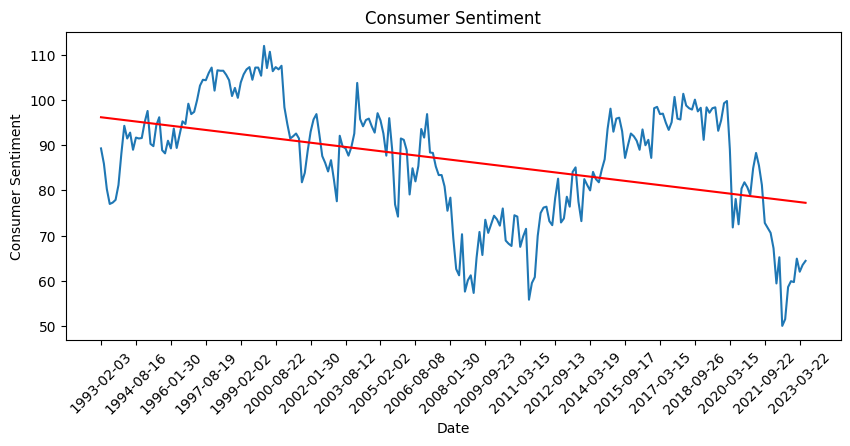

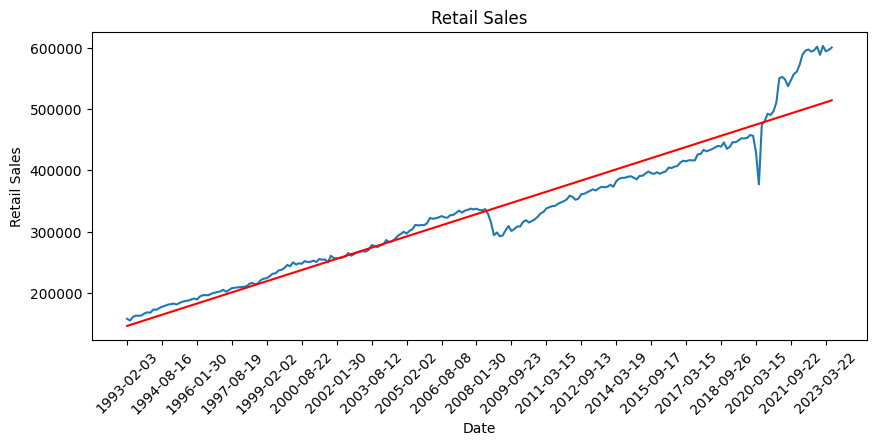

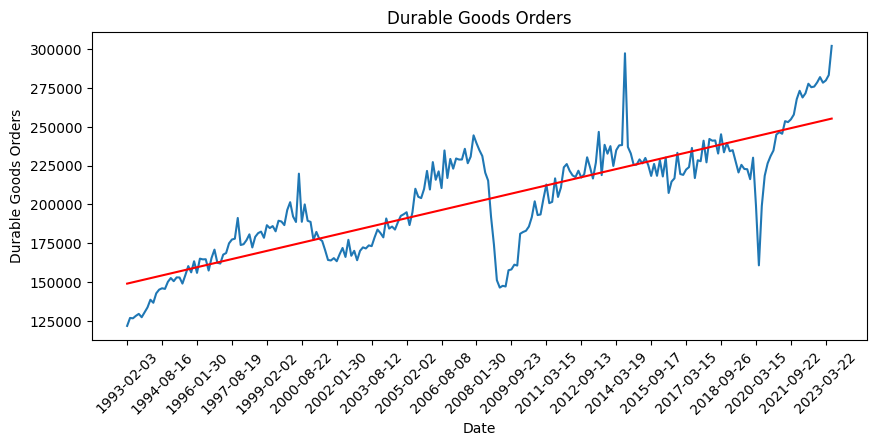

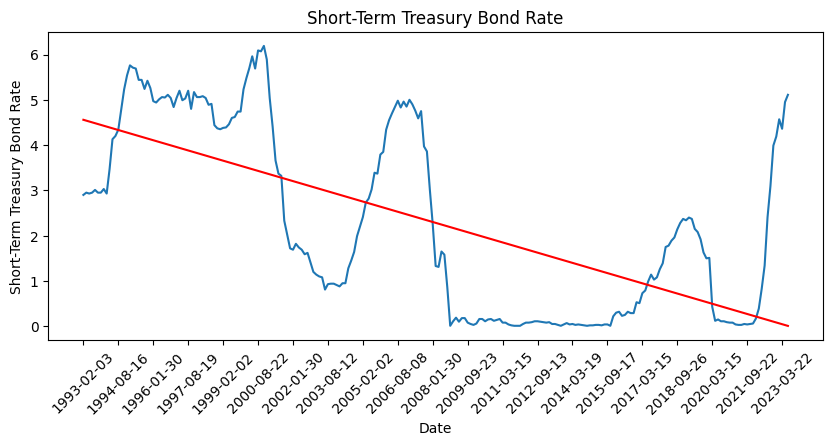

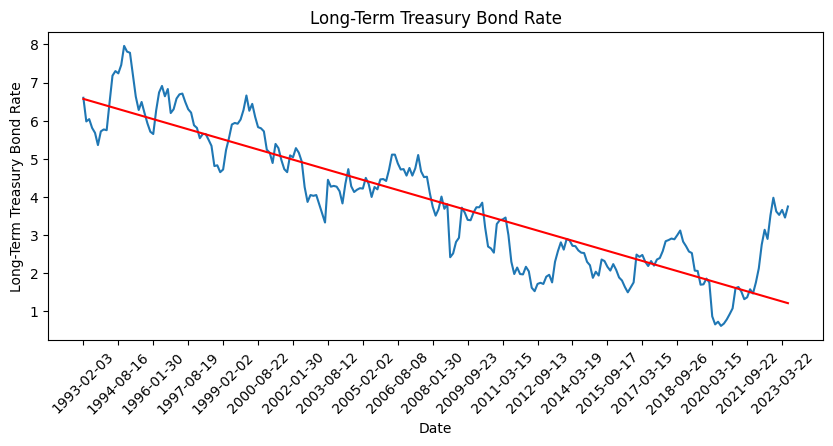

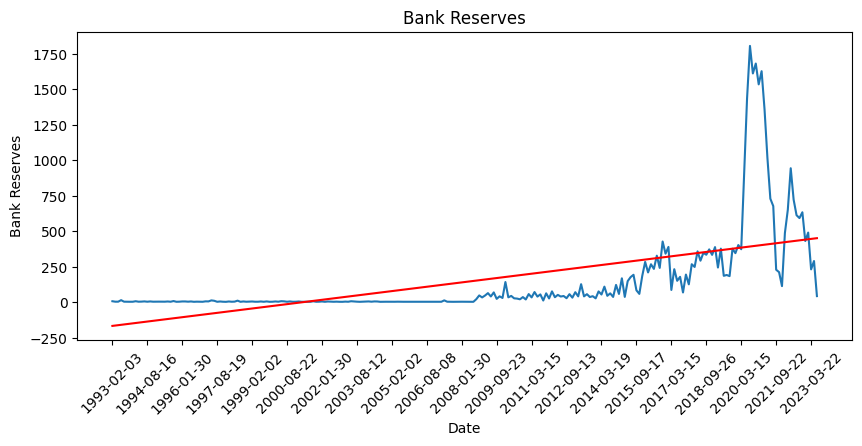

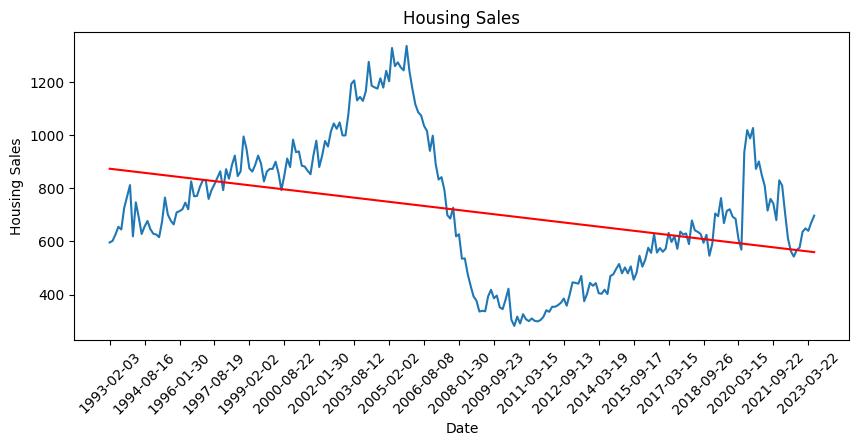

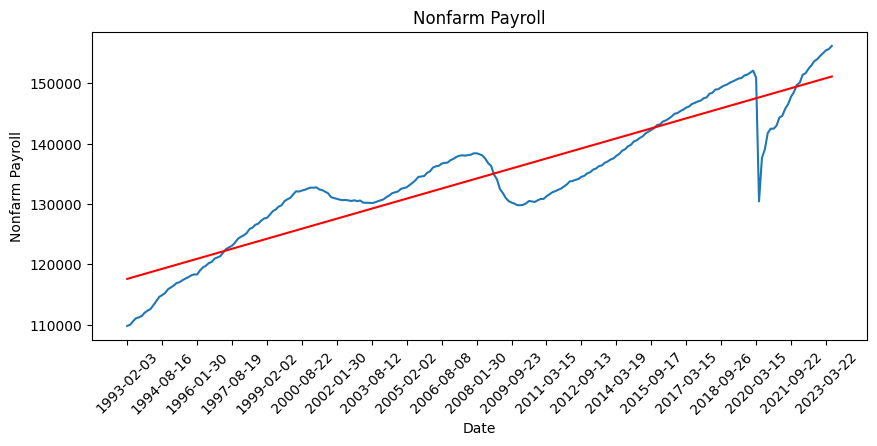

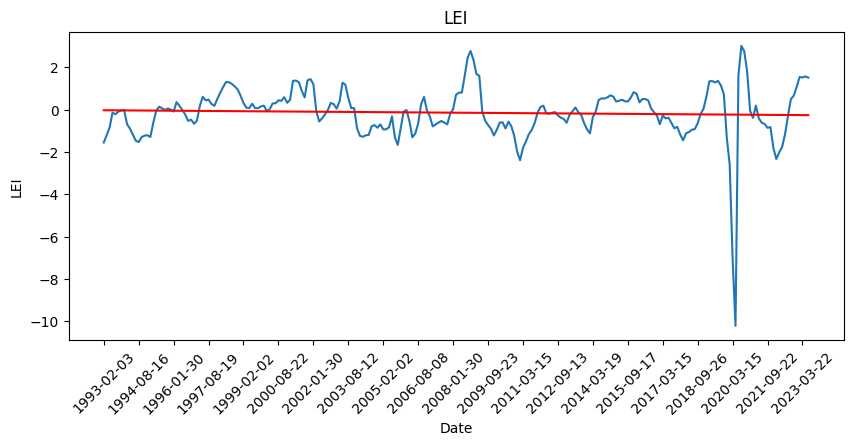

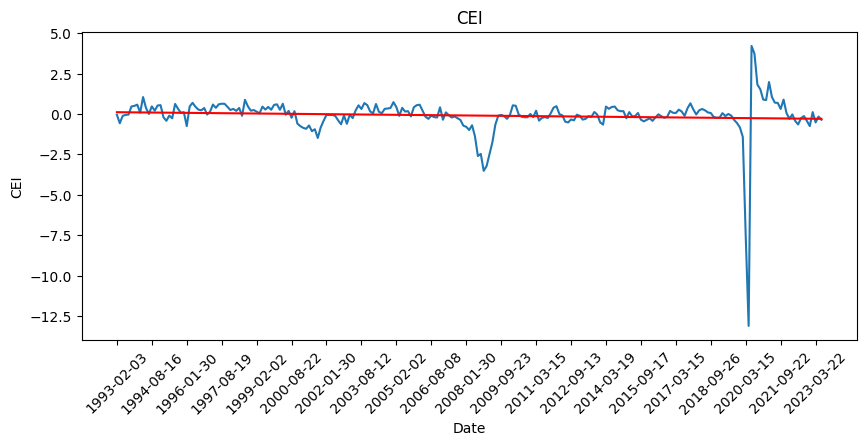

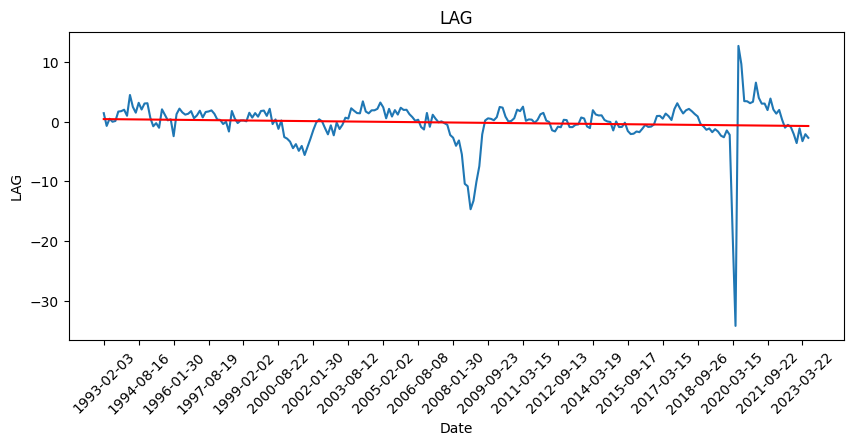

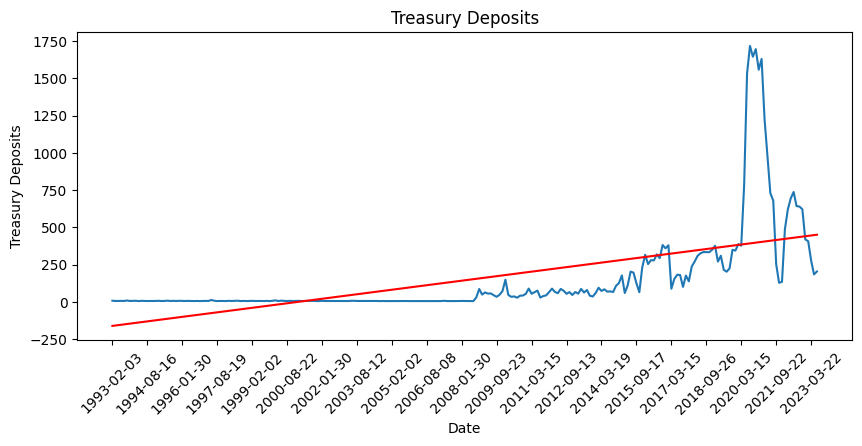

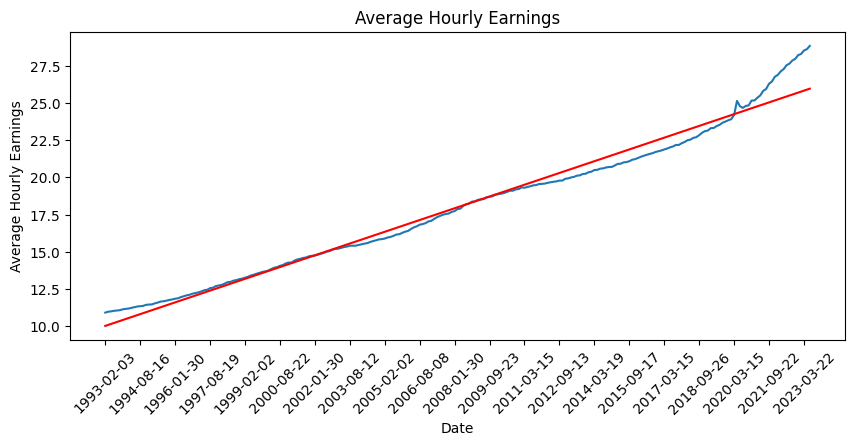

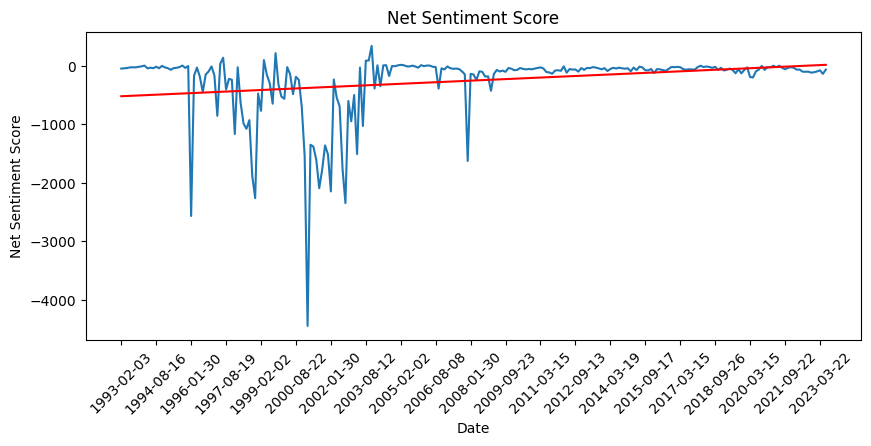

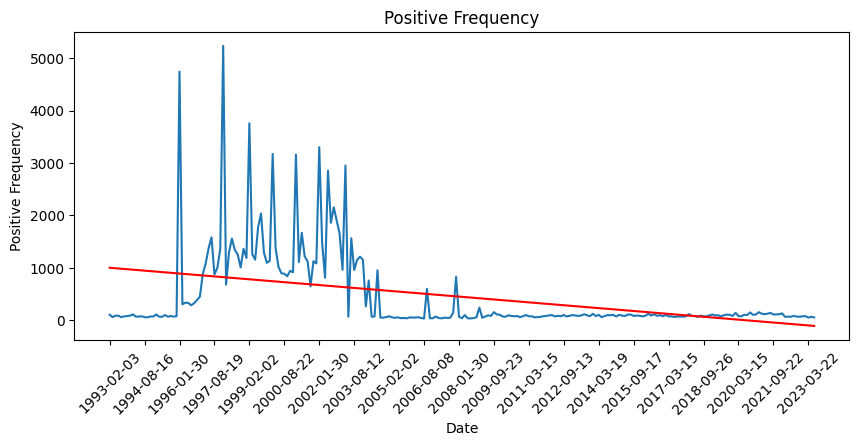

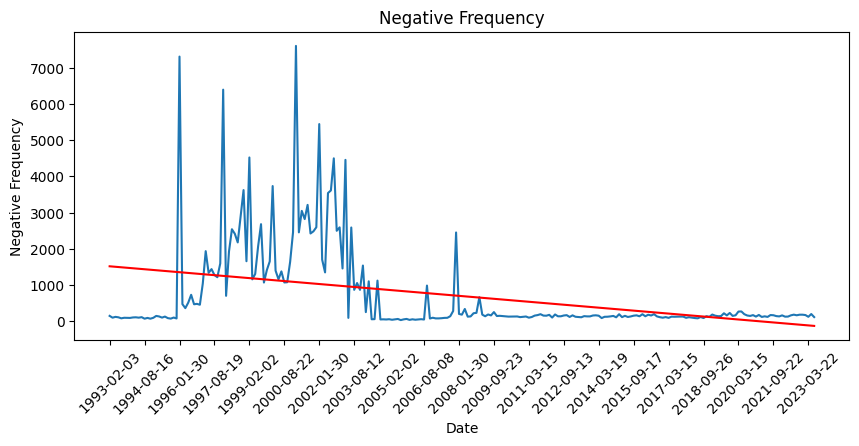

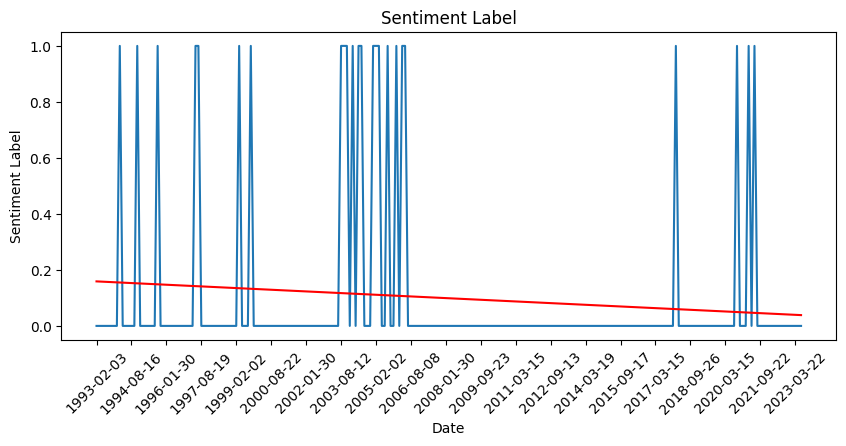

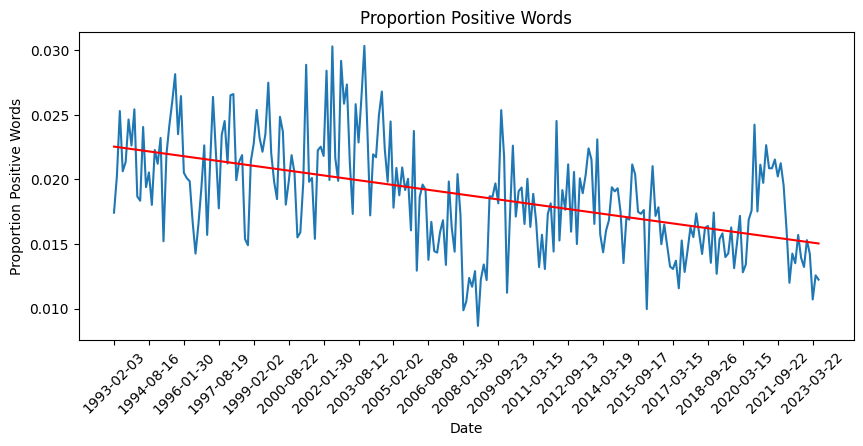

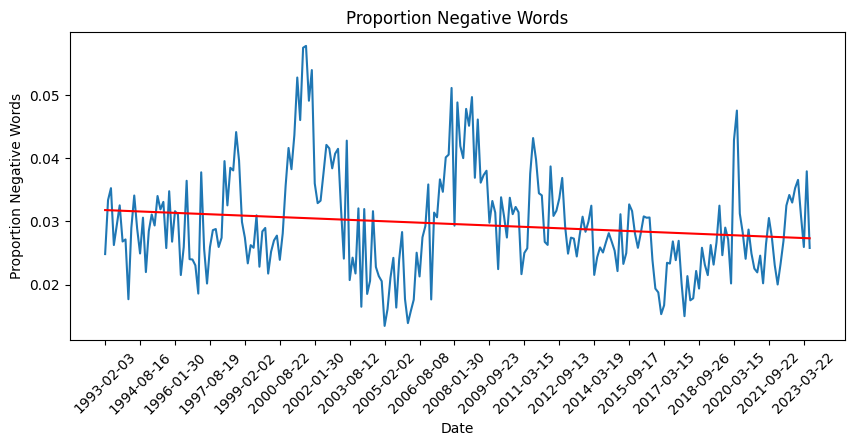

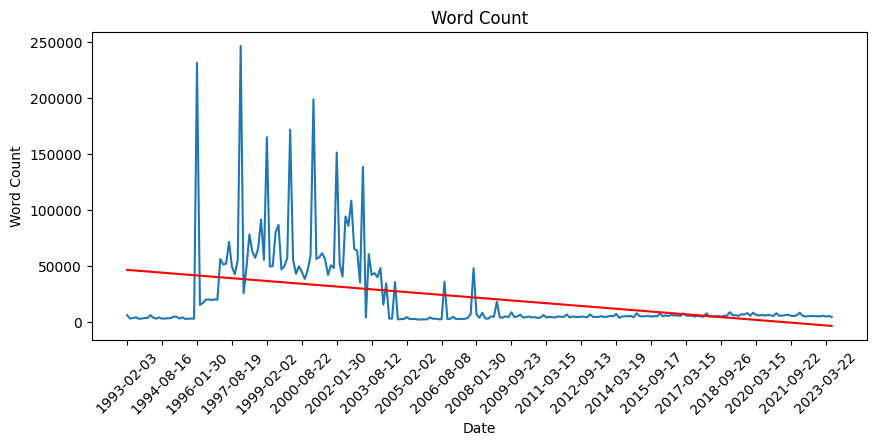

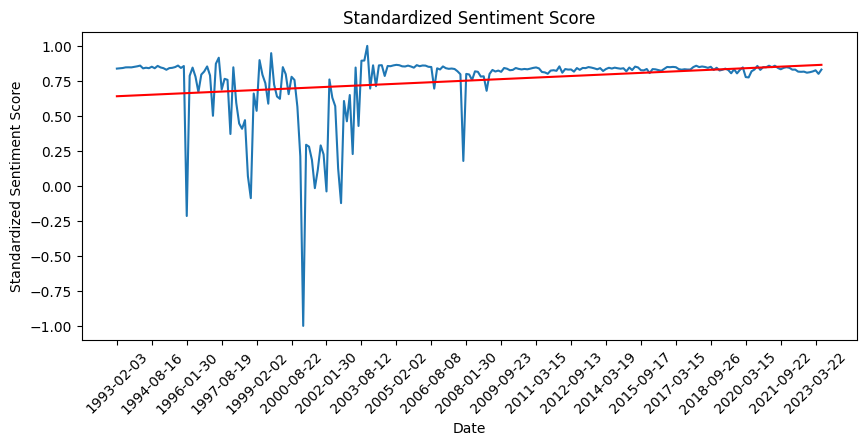

In [25]:
for column in clean_data_numeric.columns:
    if column != 'Date' and column != 'Positive Words' and column != 'Negative Words':
        plt.figure(figsize=(10, 4))
        plt.plot(clean_data_numeric['Date'], clean_data_numeric[column])
        plt.title(column)
        plt.xlabel('Date')
        plt.ylabel(column)
        plt.xticks(clean_data_numeric['Date'][::12], rotation=45)

        # Convert column values to numeric
        y = pd.to_numeric(clean_data_numeric[column], errors='coerce')

        # Calculate the line of best fit
        x = np.arange(len(clean_data_numeric['Date']))
        slope, intercept, _, _, _ = linregress(x, y)
        line = slope * x + intercept

        plt.plot(x, line, color='red')
        plt.show()

###Save the data for Feature Engineering

In [26]:
dataset.to_csv(r'C:\Users\abact\BC-Project\data\dataset.csv', index=False)

###Partition the data so it's ready for training.

In [27]:
# Split into training, validation, and test sets
train_data, temp_data = train_test_split(dataset, test_size=0.2, shuffle=False)
val_data, test_data = train_test_split(temp_data, test_size=0.5, shuffle=False)

# Verify the sizes of each set
print("Training set size:", len(train_data))
print("Validation set size:", len(val_data))
print("Test set size:", len(test_data))

train_data.to_csv(r'C:\Users\abact\BC-Project\data\train_data.csv', index=False)
temp_data.to_csv(r'C:\Users\abact\BC-Project\data\temp_data.csv', index=False)
val_data.to_csv(r'C:\Users\abact\BC-Project\data\val_data.csv', index=False)

Training set size: 194
Validation set size: 24
Test set size: 25


In [28]:
dataset['Positive Words']

0      [pleasure, satisfactory, satisfactory, opportu...
1      [strong, gain, despite, strong, gain, gain, go...
2      [strong, gain, strengthened, strong, gain, goo...
3      [strength, gain, gain, good, good, rebound, hi...
4      [gain, strong, gain, good, rebounded, gain, st...
5      [pleasure, satisfactory, satisfactory, gain, g...
6      [strengthening, gain, gain, gain, rebound, goo...
7      [strong, boosted, gain, despite, gain, good, g...
8      [pleasure, satisfactory, satisfactory, opportu...
9      [despite, strong, gain, rebounded, despite, hi...
10     [favorable, stronger, gain, strong, rebound, i...
11     [strong, achieve, gain, strong, rebounded, hig...
12     [gain, favorable, strong, gain, despite, good,...
13     [good, bolstered, strong, gain, strength, gain...
14     [strong, despite, strong, gain, gain, strength...
15     [strong, strong, gain, good, gain, stronger, g...
16     [pleasure, satisfactory, satisfactory, strong,...
17     [opportunity, good, good